In [1]:
import numpy as np 
import pandas as pd 
import scipy as sp 
from scipy import stats 
import matplotlib.pyplot as plt  
import seaborn as sns

/var/folders/vb/08bw66p50l7fsmzng9tj5m9h0000gn/T/ipykernel_22338/2751821970.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Here's the data we'll be working with.

<Axes: xlabel='x', ylabel='y'>

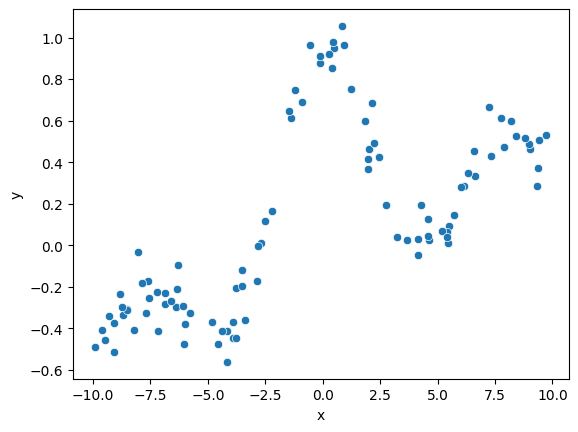

In [2]:
data = pd.read_csv('data.csv', header=None)
data.columns = ['x', 'y']
sns.scatterplot(data=data, x='x', y='y')

In [3]:
data.shape

(100, 2)

We're going to fit a function of the form $H(x) = w_1\phi_1(x)+w_2\phi_2(x)+\dots+w_{50}\phi_{50}(x)$, where each $\phi_i(x)$ is a Gaussian basis function. The 50 Gaussian basis functions are equally-spaced, with the first at $\mu_1 = -10$ and the last at $\mu_{50} = 10$. The width of each Gaussian is $\sigma = 1$. 

In [15]:
# Gaussian function 
def gauss(x, mu, sigma): 
    return np.exp(-1 * (x - mu)**2 / sigma**2)


def ols_gauss_basis_50_fit(data):
    '''
    This function fits a linear predictor with 50 gaussian basis functions.
    It calculates the vector of basis functions given the data. Next, it finds
    the optimal weight vector which minimizes the risk for OLS regression.
    '''
    # Fit our linear predictor.
    sigma = 1
    n = data.shape[0]
    # Create the design matrix
    phi = np.array(
        [gauss(data.x, mu_i, sigma) for mu_i in np.linspace(-10,10, 50)]).T
    # Calculate the p
    w = np.matmul(
        np.linalg.inv(np.matmul(phi.T, phi)), 
        np.matmul(phi.T, data.y))
    return w


def ridge_gauss_basis_50_fit(data, lambd=0.01):
    '''
    This function fits a linear predictor with 50 gaussian basis functions.
    It calculates the vector of basis functions given the data. Next, it finds
    the optimal weight vector which minimizes the risk for ridge regression.
    '''
    # Fit our linear predictor.
    sigma = 1
    n = data.shape[0]
    # Create the design matrix
    phi = np.array(
        [gauss(data.x, mu_i, sigma) for mu_i in np.linspace(-10,10, 50)]).T
    # Calculate the p
    w = np.matmul(
        np.linalg.inv(np.matmul(phi.T, phi) + n * lambd * np.identity(50)), 
        np.matmul(phi.T, data.y))
    return w


Let's try using OLS with our basis function to run predictions over our data.

w: [  -51.00510471   179.654918    -362.81762901   544.36933051
  -665.62958867   678.88708806  -554.42563698   275.05250804
   171.28134793  -797.36247272  1605.56153237 -2572.84130714
  3640.42229975 -4729.69760782  5767.13953882 -6695.57993682
  7466.35383286 -8043.94301286  8412.74770595 -8586.45954734
  8603.33837667 -8512.42363298  8357.23007967 -8153.95796994
  7891.72083481 -7537.96469533  7067.30009592 -6472.13494207
  5771.70593081 -4996.01064243  4188.35404826 -3403.18821425
  2705.86924221 -2154.13463921  1782.63253491 -1596.66612869
  1574.7839817  -1677.79259317  1860.62794959 -2078.74924805
  2288.29276441 -2445.1173846   2509.48658358 -2448.34582681
  2245.72724892 -1903.17182382  1448.34216505  -937.84967177
   464.5619697   -133.11993933]


<Axes: xlabel='x', ylabel='y'>

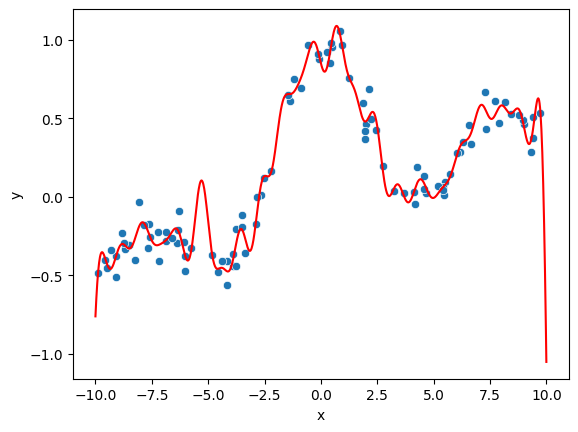

In [16]:
sigma = 1
x_fill = np.linspace(-10,10, 1000)
phi = np.array(
        [gauss(x_fill, mu_i, sigma) for mu_i in np.linspace(-10,10, 50)]).T

phi_ols = np.array(
        [gauss(data.x, mu_i, sigma) for mu_i in np.linspace(-10,10, 50)]).T

w_ols = np.linalg.lstsq(phi_ols, data.y, rcond=None)[0]

# w = ols_gauss_basis_50_fit(data)
print(f'w: {w_ols}')
sns.scatterplot(data=data, x='x', y='y')
sns.lineplot(x=x_fill, y=np.matmul(phi, w_ols), color='red')

As we there is a quite a bit of overfitting. Let's try using ridge regression with lambda = 0.01 instead.

w: [-0.14464632 -0.14687751 -0.11141274 -0.06343294 -0.03167119 -0.03343779
 -0.05800012 -0.06960932 -0.05752252 -0.05177621 -0.06526841 -0.07919454
 -0.09267443 -0.11639953 -0.12811877 -0.10158779 -0.05808818 -0.0318969
 -0.01392782  0.02760218  0.09620553  0.16099561  0.19238199  0.19367974
  0.19666664  0.22385723  0.25033081  0.22906559  0.167387    0.12125597
  0.10141384  0.064939    0.00664786 -0.02335011 -0.00065812  0.0327701
  0.02546281 -0.01100824 -0.01755346  0.02810604  0.08696249  0.12109423
  0.13205452  0.13504697  0.13272266  0.12011509  0.10351029  0.10153201
  0.11464374  0.11472454]


<Axes: xlabel='x', ylabel='y'>

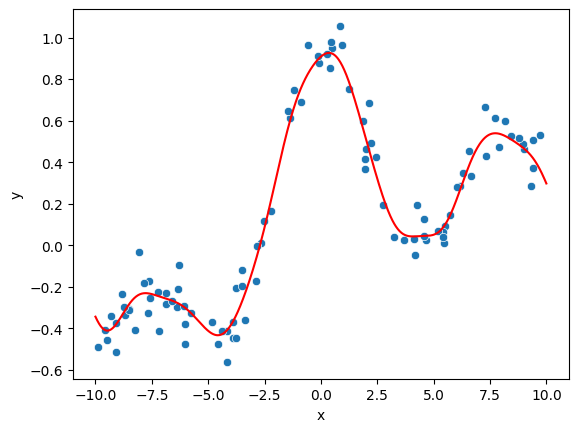

In [17]:
w = ridge_gauss_basis_50_fit(data, 0.01)
print(f'w: {w}')
sns.scatterplot(data=data, x='x', y='y')
sns.lineplot(x=x_fill, y=np.matmul(phi, w), color='red')

This worked a lot better. Below I'll plot ridge regression's output for multiple different values of lambda.

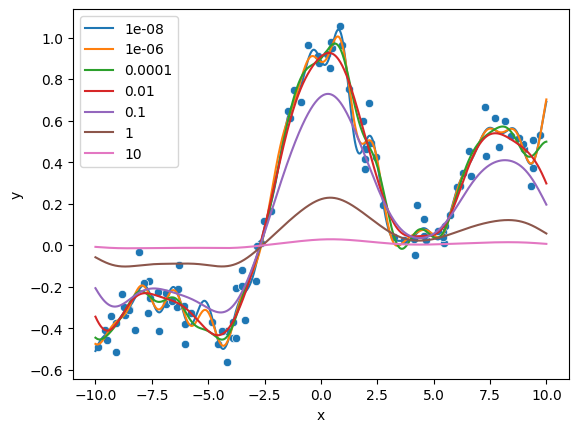

In [18]:
lambdas = [0.00000001, 0.000001, 0.0001, 0.01, 0.1, 1, 10]
W = [ridge_gauss_basis_50_fit(data, lambd) for lambd in lambdas]
# colors = 
# W = pd.DataFrame(W).T
# W.columns = lambdas

sns.scatterplot(data=data, x='x', y='y')
for i in range(len(W)):
    w = W[i]
    sns.lineplot(x=x_fill, y=np.matmul(phi, w), label=lambdas[i])

plt.legend()
plt.show()

As lambda increases the cost of a large weight vector increases so more generalizable solutions are favored. This also means that as lambda approaches 0 the prediction function becomes OLS regression (overfits the data).